In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import e
from scipy.stats import norm

x = np.array([131.15, 130.69, 130.91, 129.54, 129.64, 128.77, 130.72,
              128.33, 128.24, 129.65, 130.14, 129.29, 128.71, 129.00, 129.39,
              130.42, 129.53, 130.12, 129.78, 130.92, 131.15, 130.69, 130.91,
              129.54, 129.64, 128.77, 130.72, 128.33, 128.24, 129.65])

media = np.mean(x)
dev = np.std(x,ddof=0)
n = x.size
display(media,dev)

alpha = 0.01

phi = norm.ppf(1-alpha/2)

il = media - dev/np.sqrt(n)*phi
ir = media + dev/np.sqrt(n)*phi

print("intervallo: [{},{}]".format(il,ir))

129.75266666666664

0.9137393258230427

intervallo: [129.3229533932202,130.1823799401131]


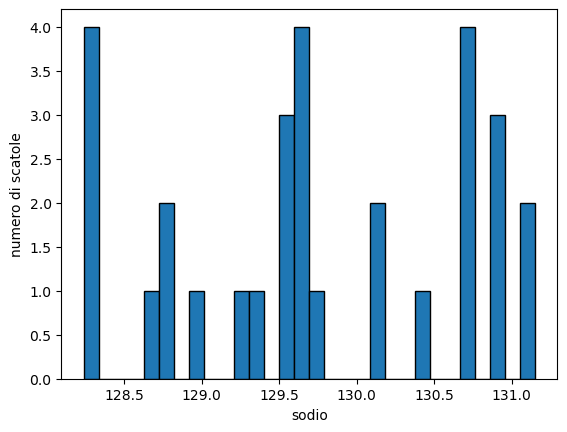

In [19]:
plt.hist(x,n,edgecolor="black")
plt.xlabel("sodio")
plt.ylabel("numero di scatole")
plt.show()

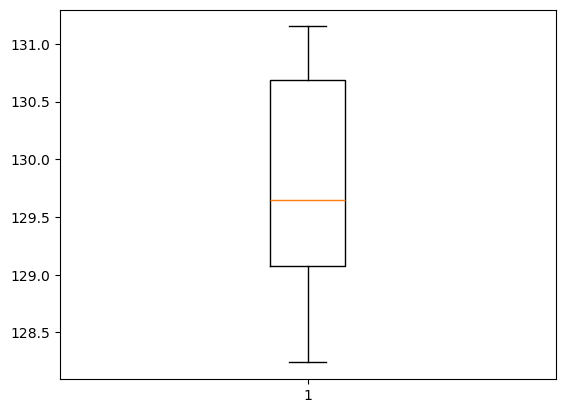

In [21]:
plt.boxplot(x)
plt.show()

non abbiamo abbastanza elementi per rigettare l'ipotesi nulla
zona di rigetto: [129.67302858987068,130.32697141012932]
129.75266666666664


0.13818347109720186

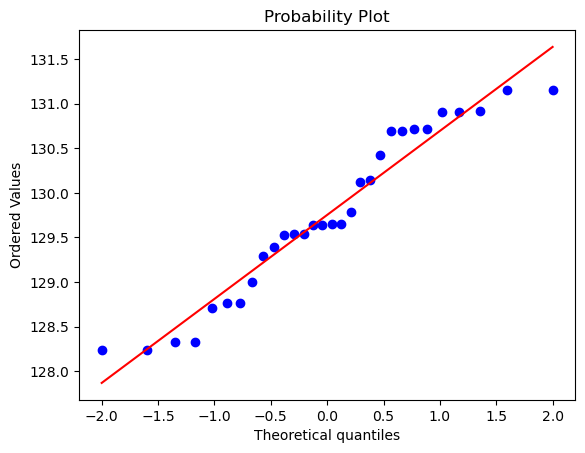

In [39]:
#test sulla media

alpha = 0.05
mu = 130

phi = norm.ppf(1-alpha/2)

Zl = mu - dev/np.sqrt(n)*phi
Zr = mu + dev/np.sqrt(n)*phi

Z = (media - mu)/dev*np.sqrt(n)

#analogo con abs(Z) > phi se maggiore si rigetta 
if media < Zl or media>Zr:
    print("si rigetta l'ipotesi nulla in favore di quella alternativa")
    print("intervallo: [{},{}]".format(Zl,Zr))
    print(media)
else:
    print("non abbiamo abbastanza elementi per rigettare l'ipotesi nulla")
    print("zona di rigetto: [{},{}]".format(Zl,Zr))
    print(media)

pvalue = 2*(1-norm.cdf(np.abs(Z)))
display(pvalue)

from scipy.stats import probplot

probplot(x,dist=norm,plot = plt)
plt.show()

In [61]:
#non segue una distrubuzione normale di sodio


x = np.array([[0,1/3,2/3],[2/3,0,1/3],[1/3,2/3,0]])
display(x)

lam , V = np.linalg.eig(x)
display(lam)

v = np.real(V[:,0])/np.real(np.sum(V[:,0]))
display(v)

#metodo monte carlo

F = np.zeros(3)
j = np.random.randint(3)
F[j] = F[j]+1
N = 1000000
for i in range(N):
    j_multi = np.random.multinomial(1, x[j,:])
    j = np.nonzero(j_multi)[0][0]
    F[j] = F[j]+1
f = F/N
display(f)

array([[0.        , 0.33333333, 0.66666667],
       [0.66666667, 0.        , 0.33333333],
       [0.33333333, 0.66666667, 0.        ]])

array([ 1. +0.j        , -0.5+0.28867513j, -0.5-0.28867513j])

array([0.33333333, 0.33333333, 0.33333333])

array([0.333065, 0.333088, 0.333848])